## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [1]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 173us/step - loss: 2.2869 - accuracy: 0.1453 - val_loss: 2.2363 - val_accuracy: 0.1898
Epoch 2/500
50000/50000 [==============================] - 9s 172us/step - loss: 2.2109 - accuracy: 0.2084 - val_loss: 2.1852 - val_accuracy: 0.2159
Epoch 3/500
50000/50000 [==============================] - 8s 169us/step - loss: 2.1642 - accuracy: 0.2306 - val_loss: 2.1435 - val_accuracy: 0.2410
Epoch 4/500
50000/50000 [==============================] - 9s 176us/step - loss: 2.1247 - accuracy: 0.2507 - val_loss: 2.1076 - val_accuracy: 0.2576
Epoch 5/500
50000/50000 [==============================] - 9s 175us/step - loss: 2.0903 - accuracy: 0.2652 - val_loss: 2.0762 - val_accuracy: 0.2674
Epoch 6/500
50000/50000 [==============================] - 8s 167us/step - loss: 2.0596 - accuracy: 0.2750 - val_loss: 2.0474 - val_accuracy: 0.2851
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 8s 156us/step - loss: 1.6794 - accuracy: 0.4166 - val_loss: 1.6826 - val_accuracy: 0.4125
Epoch 56/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.6760 - accuracy: 0.4165 - val_loss: 1.6800 - val_accuracy: 0.4135
Epoch 57/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6729 - accuracy: 0.4184 - val_loss: 1.6820 - val_accuracy: 0.4075
Epoch 58/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.6700 - accuracy: 0.4188 - val_loss: 1.6744 - val_accuracy: 0.4153
Epoch 59/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.6668 - accuracy: 0.4203 - val_loss: 1.6734 - val_accuracy: 0.4174
Epoch 60/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.6638 - accuracy: 0.4212 - val_loss: 1.6699 - val_accuracy: 0.4159
Epoch 61/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.6608 - accuracy: 0.4223 - val

50000/50000 [==============================] - 8s 153us/step - loss: 1.5418 - accuracy: 0.4633 - val_loss: 1.5632 - val_accuracy: 0.4515
Epoch 110/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.5401 - accuracy: 0.4637 - val_loss: 1.5598 - val_accuracy: 0.4488
Epoch 111/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.5379 - accuracy: 0.4649 - val_loss: 1.5635 - val_accuracy: 0.4474
Epoch 112/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.5359 - accuracy: 0.4656 - val_loss: 1.5540 - val_accuracy: 0.4522
Epoch 113/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.5342 - accuracy: 0.4663 - val_loss: 1.5580 - val_accuracy: 0.4493
Epoch 114/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.5324 - accuracy: 0.4665 - val_loss: 1.5515 - val_accuracy: 0.4531
Epoch 115/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.5302 - accuracy: 0.4674

50000/50000 [==============================] - 8s 166us/step - loss: 1.4490 - accuracy: 0.4968 - val_loss: 1.4882 - val_accuracy: 0.4723
Epoch 164/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.4473 - accuracy: 0.4966 - val_loss: 1.4880 - val_accuracy: 0.4725
Epoch 165/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.4457 - accuracy: 0.4968 - val_loss: 1.4891 - val_accuracy: 0.4691
Epoch 166/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.4443 - accuracy: 0.4965 - val_loss: 1.4865 - val_accuracy: 0.4718
Epoch 167/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.4425 - accuracy: 0.4975 - val_loss: 1.4872 - val_accuracy: 0.4742
Epoch 168/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.4412 - accuracy: 0.4982 - val_loss: 1.4829 - val_accuracy: 0.4714
Epoch 169/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.4401 - accuracy: 0.4994

50000/50000 [==============================] - 8s 166us/step - loss: 1.3726 - accuracy: 0.5213 - val_loss: 1.4502 - val_accuracy: 0.4829
Epoch 218/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.3717 - accuracy: 0.5221 - val_loss: 1.4381 - val_accuracy: 0.4856
Epoch 219/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.3699 - accuracy: 0.5213 - val_loss: 1.4403 - val_accuracy: 0.4869
Epoch 220/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.3688 - accuracy: 0.5223 - val_loss: 1.4434 - val_accuracy: 0.4880
Epoch 221/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.3674 - accuracy: 0.5229 - val_loss: 1.4384 - val_accuracy: 0.4825
Epoch 222/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.3659 - accuracy: 0.5241 - val_loss: 1.4382 - val_accuracy: 0.4901
Epoch 223/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3644 - accuracy: 0.5253

50000/50000 [==============================] - 8s 163us/step - loss: 1.3042 - accuracy: 0.5446 - val_loss: 1.4122 - val_accuracy: 0.4970
Epoch 272/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.3036 - accuracy: 0.5459 - val_loss: 1.4120 - val_accuracy: 0.4937
Epoch 273/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.3020 - accuracy: 0.5456 - val_loss: 1.3981 - val_accuracy: 0.4984
Epoch 274/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.3009 - accuracy: 0.5457 - val_loss: 1.4075 - val_accuracy: 0.4910
Epoch 275/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.2995 - accuracy: 0.5464 - val_loss: 1.3970 - val_accuracy: 0.5007
Epoch 276/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.2986 - accuracy: 0.5472 - val_loss: 1.4143 - val_accuracy: 0.4891
Epoch 277/500
50000/50000 [==============================] - 11s 212us/step - loss: 1.2975 - accuracy: 0.547

50000/50000 [==============================] - 8s 161us/step - loss: 1.2418 - accuracy: 0.5685 - val_loss: 1.3748 - val_accuracy: 0.5045
Epoch 326/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.2403 - accuracy: 0.5675 - val_loss: 1.3726 - val_accuracy: 0.5075
Epoch 327/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.2398 - accuracy: 0.5691 - val_loss: 1.3817 - val_accuracy: 0.5019
Epoch 328/500
50000/50000 [==============================] - 11s 210us/step - loss: 1.2388 - accuracy: 0.5685 - val_loss: 1.3943 - val_accuracy: 0.4989
Epoch 329/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.2377 - accuracy: 0.5688 - val_loss: 1.3969 - val_accuracy: 0.5044
Epoch 330/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.2357 - accuracy: 0.5710 - val_loss: 1.3766 - val_accuracy: 0.5087
Epoch 331/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.2359 - accuracy: 0.56

50000/50000 [==============================] - 9s 170us/step - loss: 1.1833 - accuracy: 0.5880 - val_loss: 1.3586 - val_accuracy: 0.5161
Epoch 380/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.1819 - accuracy: 0.5888 - val_loss: 1.3637 - val_accuracy: 0.5182
Epoch 381/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.1802 - accuracy: 0.5899 - val_loss: 1.4064 - val_accuracy: 0.5068
Epoch 382/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.1793 - accuracy: 0.5886 - val_loss: 1.3660 - val_accuracy: 0.5137
Epoch 383/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.1783 - accuracy: 0.5886 - val_loss: 1.3489 - val_accuracy: 0.5177
Epoch 384/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.1781 - accuracy: 0.5886 - val_loss: 1.3640 - val_accuracy: 0.5116
Epoch 385/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.1768 - accuracy: 0.5902

50000/50000 [==============================] - 8s 159us/step - loss: 1.1257 - accuracy: 0.6072 - val_loss: 1.3368 - val_accuracy: 0.5222
Epoch 434/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.1261 - accuracy: 0.6083 - val_loss: 1.3394 - val_accuracy: 0.5205
Epoch 435/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.1246 - accuracy: 0.6105 - val_loss: 1.3560 - val_accuracy: 0.5201
Epoch 436/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.1242 - accuracy: 0.6089 - val_loss: 1.3335 - val_accuracy: 0.5266
Epoch 437/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.1231 - accuracy: 0.6088 - val_loss: 1.3570 - val_accuracy: 0.5212
Epoch 438/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.1200 - accuracy: 0.6104 - val_loss: 1.3794 - val_accuracy: 0.5158
Epoch 439/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.1198 - accuracy: 0.6106

50000/50000 [==============================] - 8s 161us/step - loss: 1.0721 - accuracy: 0.6274 - val_loss: 1.3579 - val_accuracy: 0.5152
Epoch 488/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.0712 - accuracy: 0.6267 - val_loss: 1.3374 - val_accuracy: 0.5257
Epoch 489/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.0698 - accuracy: 0.6288 - val_loss: 1.3457 - val_accuracy: 0.5276
Epoch 490/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.0668 - accuracy: 0.6295 - val_loss: 1.3492 - val_accuracy: 0.5260
Epoch 491/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.0681 - accuracy: 0.6286 - val_loss: 1.3262 - val_accuracy: 0.5308
Epoch 492/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.0674 - accuracy: 0.6275 - val_loss: 1.3509 - val_accuracy: 0.5267
Epoch 493/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.0654 - accuracy: 0.6291

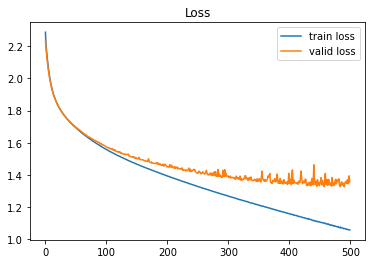

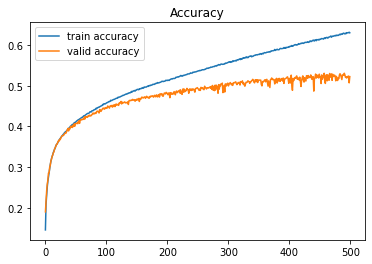

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()